In [1]:
import import_ipynb
from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from aqi_epa_pm25.ipynb
PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_2BBA    float64
TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_14D6    float64
TANGARA_1EE6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,,
2023-10-05 22:58:30-05:00,11.0,8.0,7.0,NaN,NaN,6.0,7.0,NaN,11.0,13.0,2.0,2.0,6.0,0.0
2023-10-05 22:59:00-05:00,10.0,7.0,7.0,NaN,NaN,6.0,5.0,NaN,10.0,13.0,2.0,3.0,6.0,0.0
2023-10-05 22:59:30-05:00,10.0,7.0,7.0,NaN,NaN,5.0,5.0,NaN,11.0,14.0,3.0,4.0,6.0,0.0
2023-10-05 23:00:00-05:00,10.0,7.0,7.0,NaN,NaN,5.0,4.0,NaN,11.0,13.0,3.0,4.0,7.0,0.0
2023-10-05 23:00:30-05:00,10.0,7.0,6.0,NaN,NaN,5.0,7.0,NaN,11.0,13.0,2.0,2.0,7.0,0.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,2693.000000,2545.000000,2567.000000,1128.000000,2343.000000,2333.000000,2575.000000,2320.000000,2637.000000,2505.000000,2559.000000,2604.000000,2597.000000,2678.0
mean,8.530264,10.381139,14.042462,10.179965,9.373453,11.763823,9.294369,10.454741,11.961320,12.025948,8.095741,8.486175,9.904890,0.0
std,3.399851,4.637076,10.927316,2.736987,5.612989,4.506564,4.924404,3.269895,3.876021,4.195660,4.199834,5.186217,4.510026,0.0
min,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,5.000000,0.000000,0.000000,3.000000,0.0
25%,6.000000,6.000000,5.000000,8.000000,5.000000,8.000000,5.000000,8.000000,9.000000,8.000000,5.000000,4.000000,7.000000,0.0
50%,8.000000,10.000000,9.000000,10.000000,7.000000,11.000000,8.000000,10.000000,12.000000,12.000000,7.000000,7.000000,9.000000,0.0
75%,11.000000,13.000000,22.000000,11.000000,13.000000,16.000000,13.000000,12.000000,15.000000,15.000000,11.000000,11.000000,12.000000,0.0
max,18.000000,23.000000,50.000000,19.000000,27.000000,23.000000,25.000000,20.000000,24.000000,26.000000,20.000000,22.000000,22.000000,0.0


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,,
2023-10-05 22:58:30-05:00,46.0,34.0,30.0,NaN,NaN,25.0,30.0,NaN,46.0,53.0,9.0,9.0,25.0,0.0
2023-10-05 22:59:00-05:00,42.0,30.0,30.0,NaN,NaN,25.0,21.0,NaN,42.0,53.0,9.0,13.0,25.0,0.0
2023-10-05 22:59:30-05:00,42.0,30.0,30.0,NaN,NaN,21.0,21.0,NaN,46.0,55.0,13.0,17.0,25.0,0.0
2023-10-05 23:00:00-05:00,42.0,30.0,30.0,NaN,NaN,21.0,17.0,NaN,46.0,53.0,13.0,17.0,30.0,0.0
2023-10-05 23:00:30-05:00,42.0,30.0,25.0,NaN,NaN,21.0,30.0,NaN,46.0,53.0,9.0,9.0,30.0,0.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,2693.000000,2545.000000,2567.000000,1128.000000,2343.000000,2333.000000,2575.000000,2320.000000,2637.000000,2505.000000,2559.000000,2604.000000,2597.000000,2678.0
mean,35.257705,41.211395,48.349435,41.981383,36.681605,45.969996,36.939806,42.599138,47.375806,47.256287,33.099648,33.823733,39.580670,0.0
std,12.812065,15.268641,29.585099,9.813460,18.094501,14.503059,16.706173,10.865424,12.195433,13.201006,15.569080,17.928660,15.017354,0.0
min,13.000000,17.000000,13.000000,17.000000,13.000000,17.000000,13.000000,21.000000,17.000000,21.000000,0.000000,0.000000,13.000000,0.0
25%,25.000000,25.000000,21.000000,34.000000,21.000000,34.000000,21.000000,34.000000,38.000000,34.000000,21.000000,17.000000,30.000000,0.0
50%,34.000000,42.000000,38.000000,42.000000,30.000000,46.000000,34.000000,42.000000,50.000000,50.000000,30.000000,30.000000,38.000000,0.0
75%,46.000000,53.000000,72.000000,46.000000,53.000000,60.000000,53.000000,50.000000,58.000000,58.000000,46.000000,46.000000,50.000000,0.0
max,64.000000,74.000000,137.000000,66.000000,83.000000,74.000000,79.000000,68.000000,77.000000,81.000000,68.000000,72.000000,72.000000,0.0


## Histograms

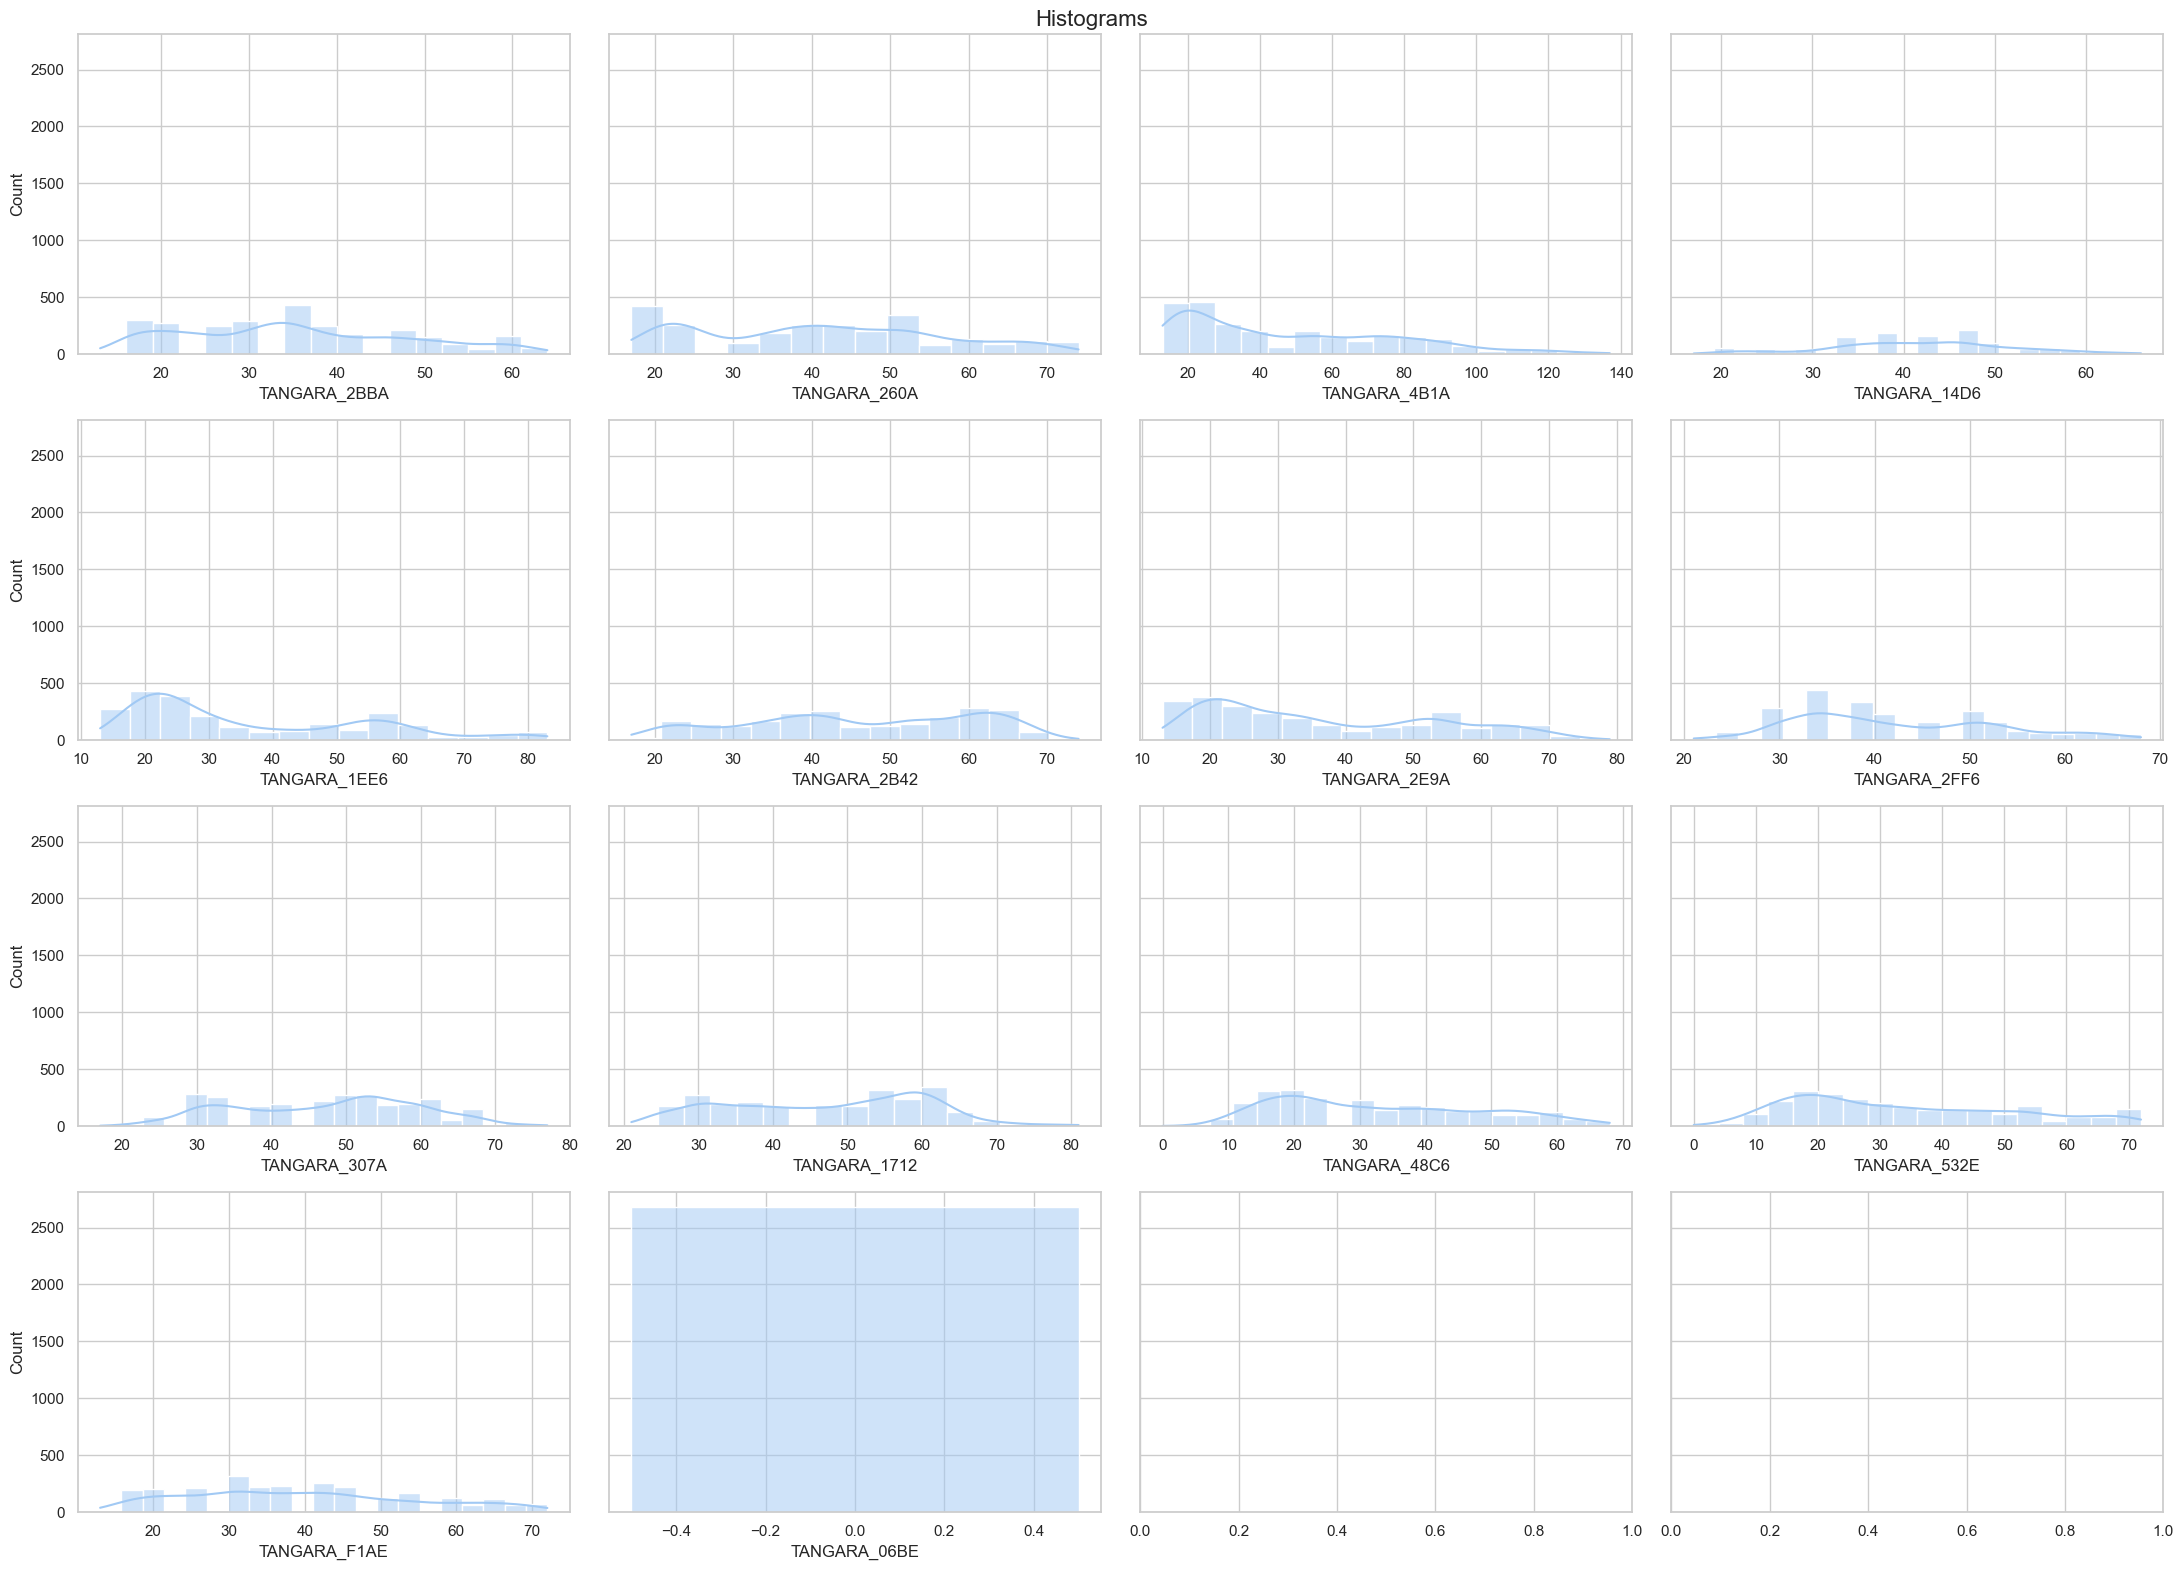

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

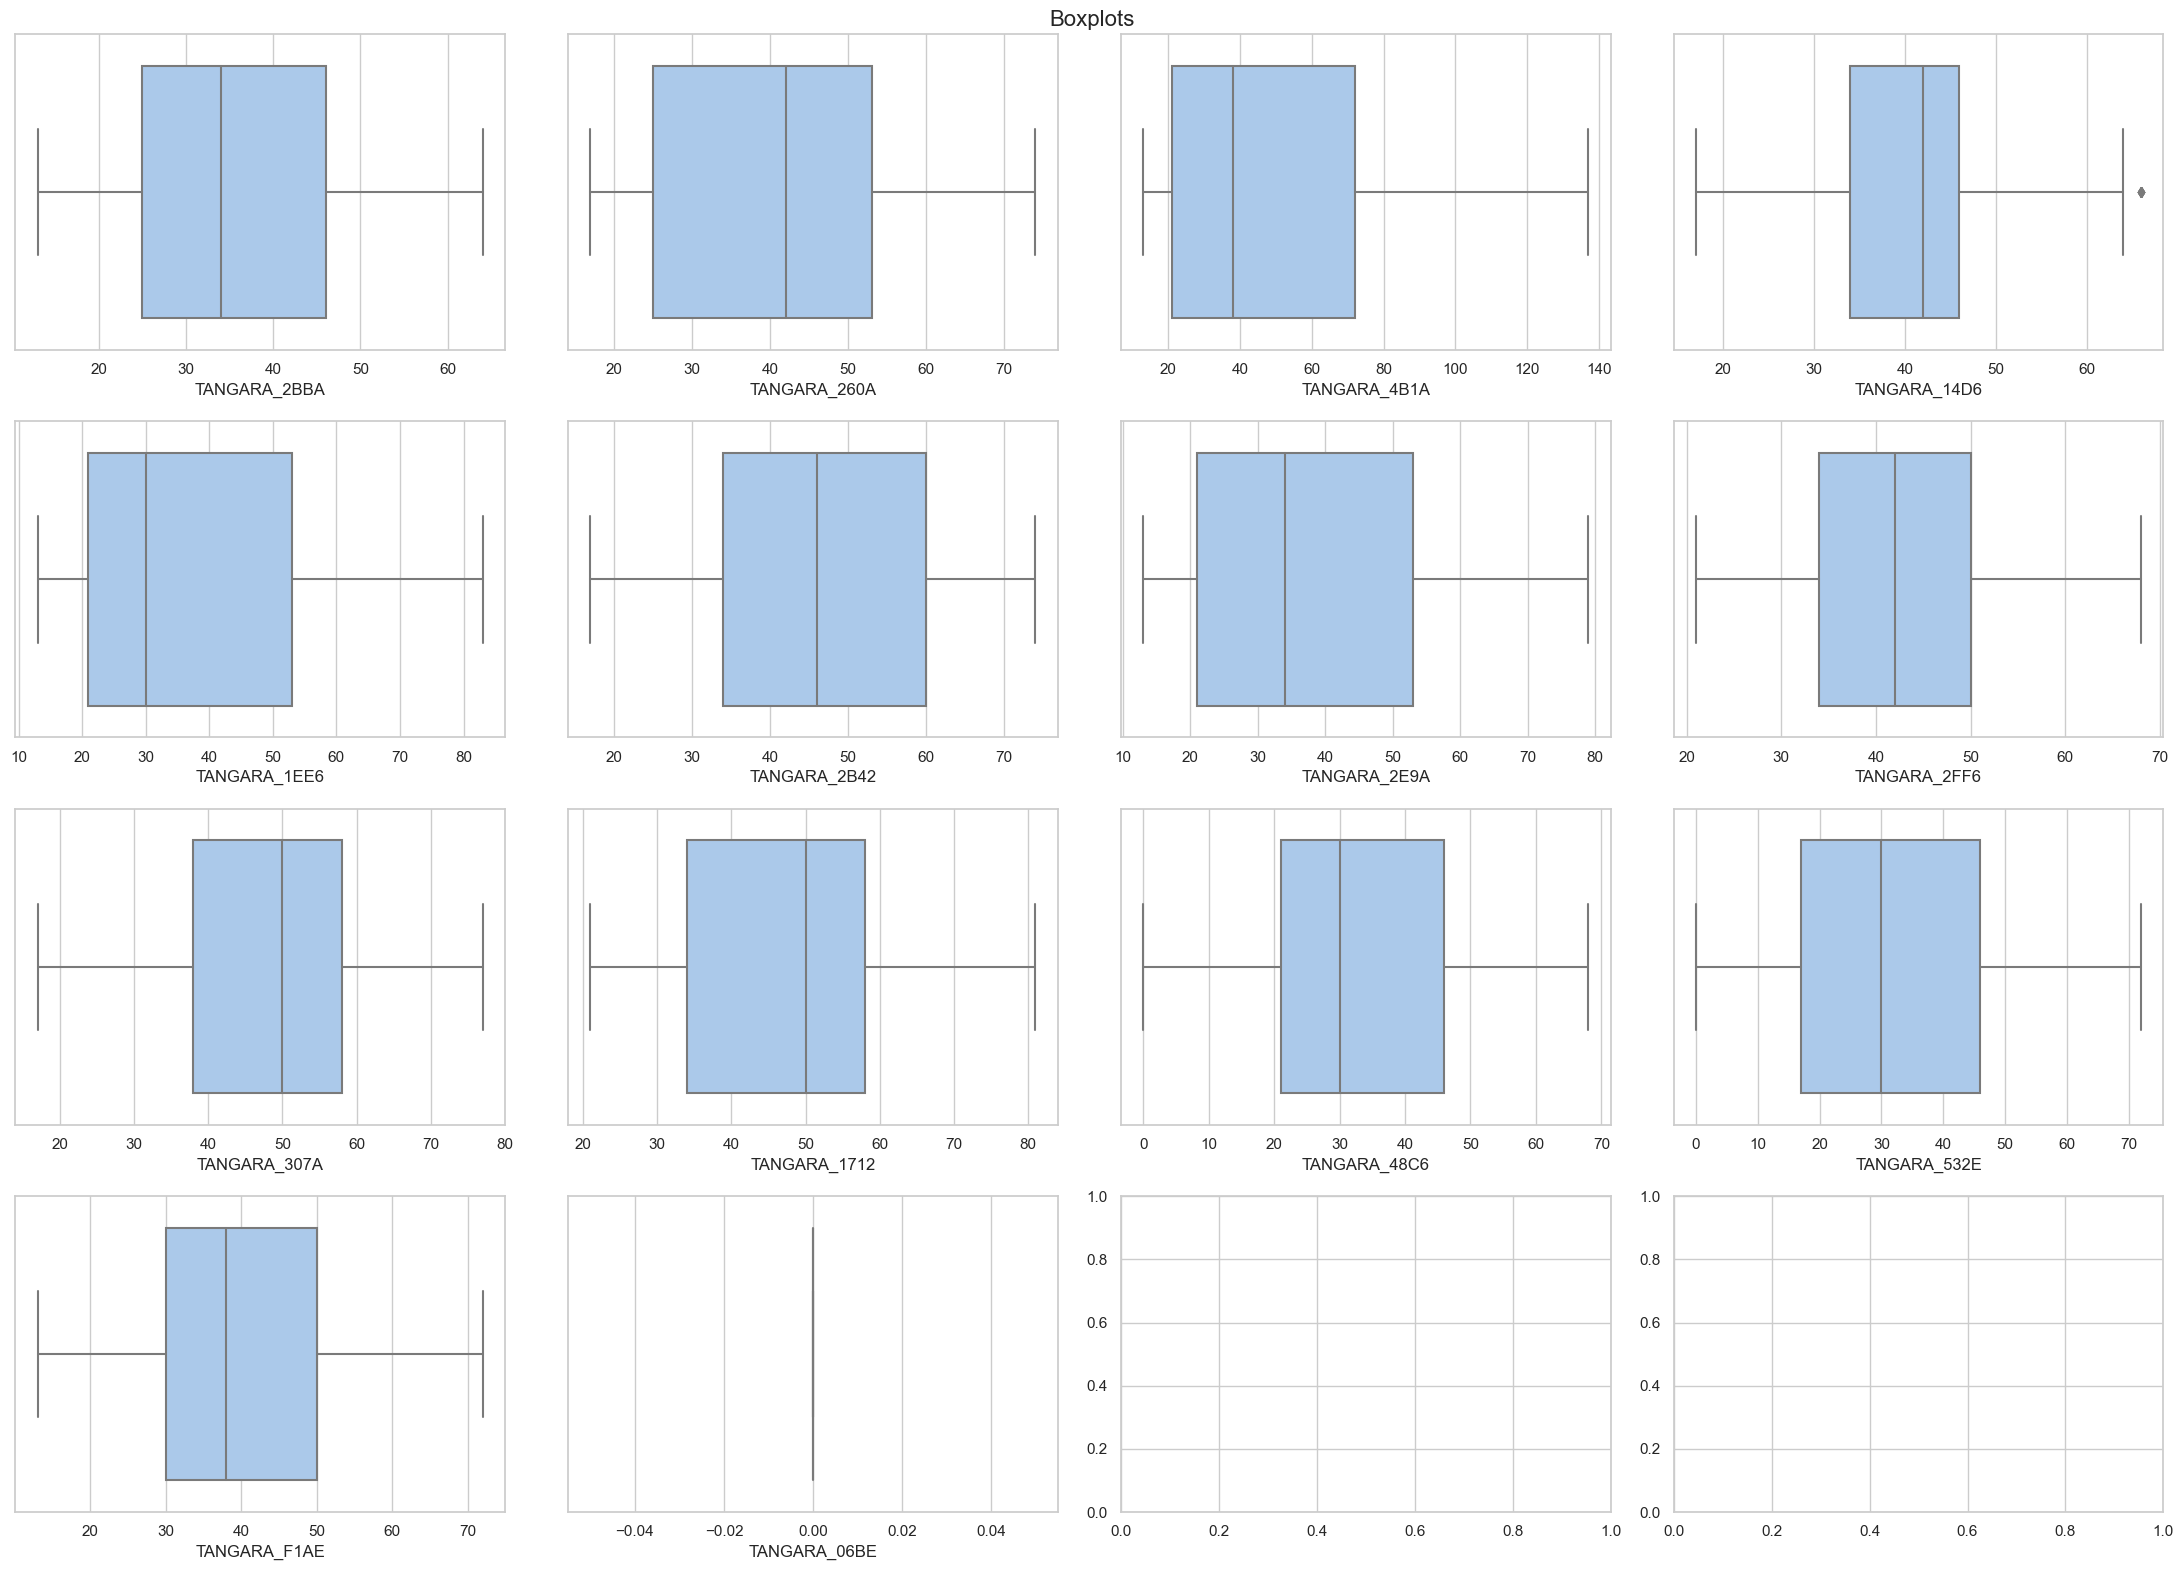

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

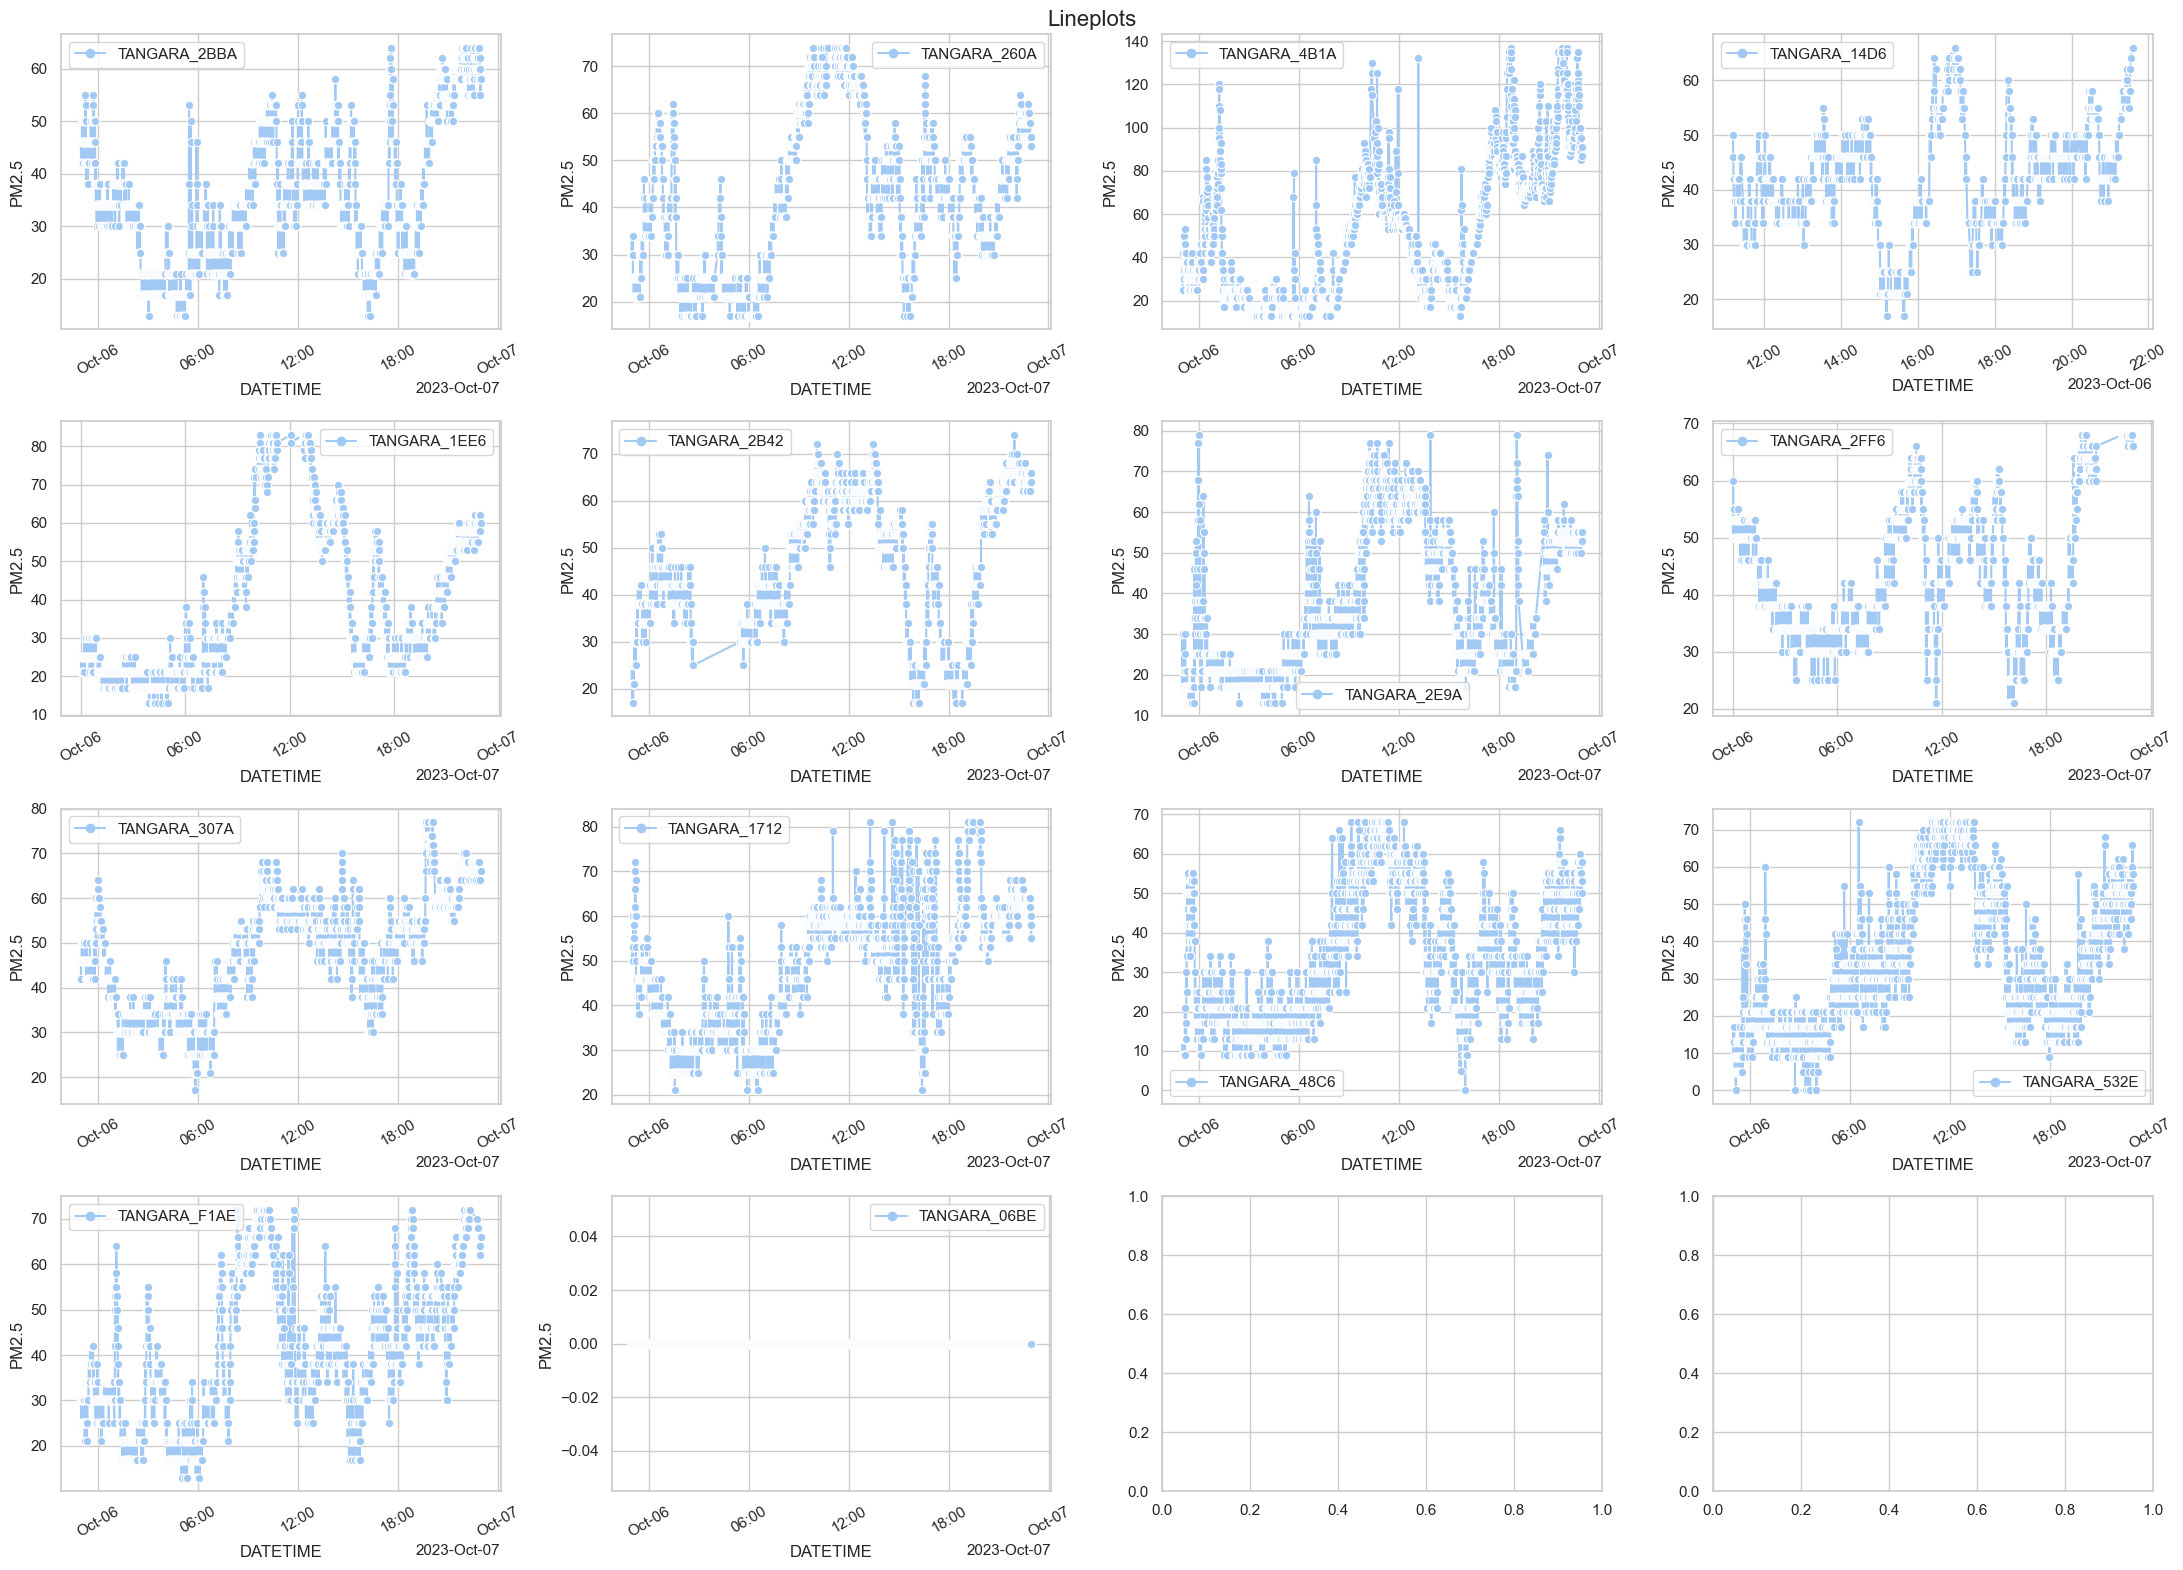

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')